In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import torch.nn as nn
import neurokit2 as nk
import sys
import os

In [2]:
import argparse
import sys
from main import parse_args as parse_args_main

def main(args):
    # 在这里使用 args 进行训练或其他操作
    args=parse_args_main()
    print(f"Task: {args.task}")
    print(f"Dataset Name: {args.dataset_name}")
    print(f"Train Data Path: {args.train_data_path}")
    print(f"Model Name: {args.model_name}")
    print(f"Mask Type: {args.mask_type}")
    return args
    # 其他代码...

if __name__ == "__main__":
    # 模拟命令行参数
    sys.argv = [
        'main.py',  # 通常是脚本名
        '--task', 'finetune',
        '--dataset_name', 'ptb-xl',
        '--train_data_path', '/root/data/ptb-xl/train.txt',
        '--val_data_path', '/root/data/ptb-xl/val.txt',
        '--model_name', 'FocusMae',
        '--mask_type', 'period',
        # 添加其他必要的参数
    ]

    parser = argparse.ArgumentParser(description='Pretrain or finetune model')
    # 添加参数
    parser.add_argument('--task', type=str, required=True, help='Task to perform')
    parser.add_argument('--dataset_name', type=str, required=True, help='Name of the dataset')
    parser.add_argument('--train_data_path', type=str, required=True, help='Path to the training data')
    parser.add_argument('--val_data_path', type=str, required=True, help='Path to the validation data')
    parser.add_argument('--model_name', type=str, required=True, default='FocusMae',help='Name of the model to use')
    parser.add_argument('--mask_type', type=str, default='period', help='Type of mask to use')  
    parser.add_argument('--ckpt_path', type=str, default='/root/ecg_ai/FocusECG/FocusECG/min_val_loss=34.49940490722656.pth', help='Type of mask to use')  
    parsed_args=parse_args_main()
    # 解析参数
    args = parser.parse_args()

    for key, value in vars(parsed_args).items():
        if value is not None:
            setattr(args, key, value)

    # 调用主函数
    main(args)

/root/miniconda3/envs/ecg/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cuda
cuda
cuda
Task: finetune
Dataset Name: ptb-xl
Train Data Path: /root/data/ptb-xl/train.txt
Model Name: FocusMae
Mask Type: period


In [3]:
from finetune_test import get_model
if __name__ == '__main__':
    model = get_model(args)

In [16]:
model.pre_train_model.blocks[0].attn.qkv.weight

Parameter containing:
tensor([[-0.0380, -0.0209, -0.0060,  ..., -0.0267,  0.0253, -0.0418],
        [-0.0362, -0.0139, -0.0125,  ...,  0.0063, -0.0023,  0.0405],
        [ 0.0347, -0.0052, -0.0323,  ..., -0.0274,  0.0092, -0.0102],
        ...,
        [-0.0425,  0.0287, -0.0081,  ...,  0.0249,  0.0241, -0.0124],
        [-0.0023,  0.0384,  0.0353,  ..., -0.0221,  0.0010, -0.0208],
        [-0.0394, -0.0097,  0.0401,  ...,  0.0389, -0.0107,  0.0062]],
       device='cuda:0')

In [22]:
model.pre_train_model.blocks[0].attn.qkv.weight.shape

torch.Size([2304, 768])

In [20]:
def plot_attention_weights(attention_weights):
    # 提取特定层和头的 attention weights
    attn = attention_weights.cpu().numpy()

    # 绘制 attention weights
    plt.figure(figsize=(10, 8))
    plt.imshow(attn, cmap='viridis')
    plt.colorbar()
    plt.title(f'Attention Weights')
    plt.xlabel('Key Position')
    plt.ylabel('Query Position')
    plt.show()

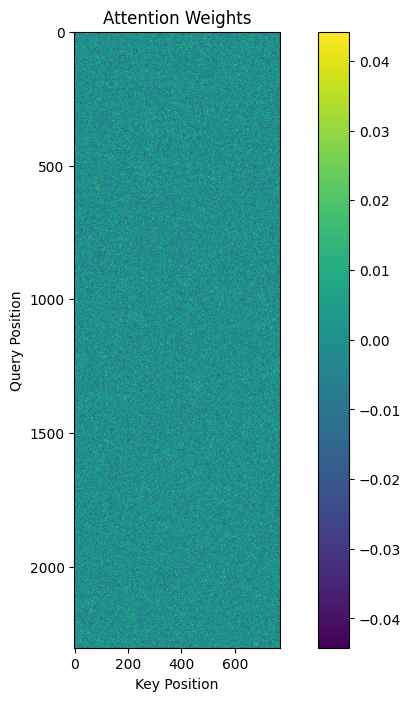

In [21]:
plot_attention_weights(model.pre_train_model.blocks[0].attn.qkv.weight)

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# 假设 model 是你的 Transformer 模型
# 假设 input_tensor 是输入到模型的张量

# 获取模型的 attention weights
def get_attention_weights(model, input_tensor):
    # 通过模型的 forward 方法获取 attention weights
    # 这里假设模型返回 attention weights
    model.eval()
    with torch.no_grad():
        # 传递输入并获取 attention weights
        output, attention_weights = model(input_tensor, return_attention=True)
    return attention_weights

# 可视化 attention weights
def plot_attention_weights(attention_weights, layer_idx=0, head_idx=0):
    # 提取特定层和头的 attention weights
    attn = attention_weights[layer_idx][head_idx].cpu().numpy()

    # 绘制 attention weights
    plt.figure(figsize=(10, 8))
    plt.imshow(attn, cmap='viridis')
    plt.colorbar()
    plt.title(f'Attention Weights - Layer {layer_idx + 1}, Head {head_idx + 1}')
    plt.xlabel('Key Position')
    plt.ylabel('Query Position')
    plt.show()

# 示例使用
# 假设 input_tensor 是你的输入数据
input_tensor = torch.randn(1, 2250, 768)  # 示例输入

# 获取 attention weights
attention_weights = get_attention_weights(model, input_tensor)

# 可视化第一个层和第一个头的 attention weights
plot_attention_weights(attention_weights, layer_idx=0, head_idx=0)